(badges)

# Fun with colour -- OPTIONAL

You don't need to understand the details of what happens in here. 

Feel free to play around with your own image files. 

I have included:

![](../imgs/Sherlock.jpg)

![](../imgs/rabbit.jpg)

![](../imgs/tubular.jpeg)

## Images to 3D plots

The following function `image_to_plot` takes
1. a string `file` and 
2. an integer `N`, 
   
and it returns a plot of `N` randomly selected pixels from the image file determined by `file` in $\mathbb{R}^3$ -- for its `(red, green, blue)` values.

In [1]:
def image_to_plot(file:str, N:int):
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt
    img = Image.open(file)
    aimg = np.asarray(img)/255
    acolor = aimg.reshape(aimg.shape[0]*aimg.shape[1], aimg.shape[2])
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    rng = np.random.default_rng()
    S = rng.choice(acolor.shape[0], size=N, replace=False)
    xs, ys, zs = np.array([acolor[s,:] for s in S]).T
    ax.scatter3D(xs, ys, zs, s=0.5)
    ax.set_xlabel("R")
    ax.set_ylabel("G")
    ax.set_zlabel("B")
    return ax

The higher the `N` the more work is needed to rotate the following plot.

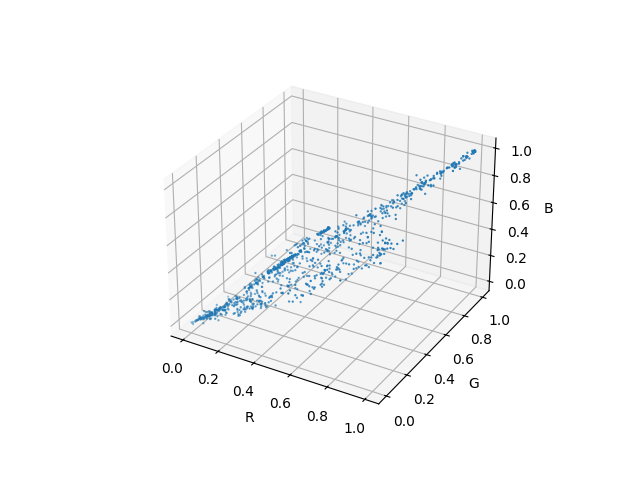

In [2]:
%matplotlib ipympl
fig = image_to_plot("../imgs/Sherlock.jpg", 1000)

In [3]:
%matplotlib inline

## Only the $k$ most popular colours

The next function can be understood as editing the image to have exactly $k$ colours, and the choosen colours are somehow the 'most' popular. (This isn't exactly correct...)

Be careful, this function is not optimized. For large images, this can take quite some time to produce.

The function `k_colours` takes as input
1. a string `file` and 
2. an integer `k`, 
   
and it returns the given image using the $k$ most popular colours. 

In [4]:
def k_colours(file:str, k:int):
    from PIL import Image
    import numpy as np
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    plt.figure().clear()
    img = Image.open(file)
    aimg = np.asarray(img)/255
    acolor = aimg.reshape(aimg.shape[0]*aimg.shape[1], aimg.shape[2])
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(acolor)
    means = [list(map(lambda x: x, pt)) for pt in kmeans.cluster_centers_]
    result = np.asarray(list(map(lambda i: means[i], kmeans.labels_)))
    aimg_new = result.reshape(aimg.shape[0], aimg.shape[1], aimg.shape[2])
    return Image.fromarray((aimg_new * 255).astype(np.uint8))

Try it out.

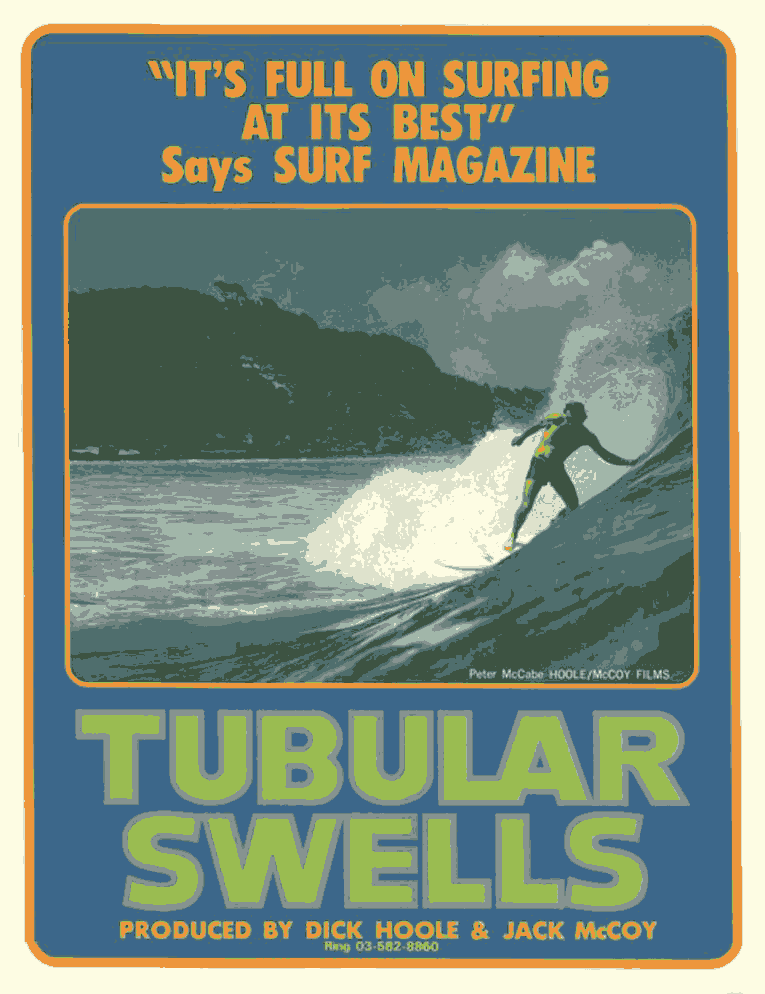

<Figure size 640x480 with 0 Axes>

In [15]:
k_colours("../imgs/tubular.jpeg", 10)